In [11]:
import pandas as pd
import plotly.express as px

In [12]:
url = "https://raw.githubusercontent.com/okHotel/ssd_project/master/data_set/monthly-sunspots.csv"
df = pd.read_csv(url)
print(df.head())

     Month  Sunspots
0  1749-01      58.0
1  1749-02      62.6
2  1749-03      70.0
3  1749-04      55.7
4  1749-05      85.0


In [13]:
df = df.sort_values(by=['Month'])
fig = px.line(df, x='Month', y='Sunspots', title='Monthly-sunspots over 350 years')
fig.show()

In [14]:
df.insert(0, 'id', range(0,len(df)))
print(df.head())

   id    Month  Sunspots
0   0  1749-01      58.0
1   1  1749-02      62.6
2   2  1749-03      70.0
3   3  1749-04      55.7
4   4  1749-05      85.0


In [15]:
from sklearn.model_selection import train_test_split
X = df[['id']].values.reshape(-1,1)
y = df[['Sunspots']].values.reshape(-1,1).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [16]:
from sklearn.svm import SVR

In [17]:
# !!! Con kernel rbf scazza le previsioni.
# !!! Con kernel linear molto meglio !!!
# C quanto penalizza i pattern fuori rangwe
# gamma 
# epsilon passo con cui ottimizzare le scelte, quanto accetti di essere distante dalla funzione trovata con svr
regressor = SVR(kernel='rbf', C=10, gamma=0.001, epsilon=0.1)
regressor.fit(X_train,y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [18]:
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,38.1,49.610785
1,42.7,43.104107
2,13.2,9.853155
3,71.8,51.993574
4,71.6,37.499160
...,...,...
559,68.1,41.216821
560,171.5,184.281496
561,9.2,16.604714
562,104.3,93.200669


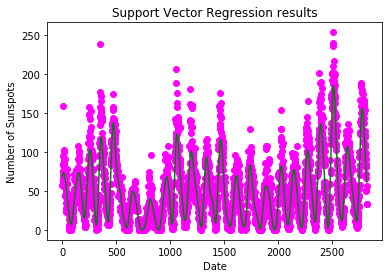

In [19]:
import matplotlib.pyplot as plt

#6 Visualising the Support Vector Regression results
plt.scatter(X, y, color = 'magenta')
plt.plot(X, regressor.predict(X), color = 'green')
plt.title('Support Vector Regression results')
plt.xlabel('Date')
plt.ylabel('Number of Sunspots')
plt.show()

In [22]:
import plotly.graph_objects as go

# predicted data = dati predetti con la regressione
# test data = dati reali usati per il test

fig = go.Figure()
fig.add_trace(go.Scatter(x=X_test.flatten(), y=y_pred.flatten(),
                    mode='markers',
                    name='predicted data'))
fig.add_trace(go.Scatter(x=X_test.flatten(), y=y_test.flatten(),
                    mode='markers',
                    name='test data'))
fig.show()

In [25]:
#per valutare le prestazioni di SVR, valore compreso tra 0 e 1 
from sklearn.metrics import explained_variance_score 
# Evaluation
# 1 - ( Var(y' - y)/Var(y) )
explained_variance_score(y_test, y_pred)

0.8644009197068571